# Linear Regression using the Spotify Track Dataset

The dataset `spotify_track_data_top50_ph.zip` contains of all songs that appeared in the Spotify Regional Chart Top 50 for the Philippines from 2017. It is extracted from https://www.kaggle.com/jcacperalta/spotify-daily-top-200-ph#spotify_top200_tracks_ph.csv

Can you build a linear model to predict a song's popularity using the metrics provided as features?

The relevant metrics are 'popularity', 'danceability', 'energy','loudness','speechiness', 'acousticness', 'instrumentalness',
 'liveness', 'valence', and 'tempo'

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [102]:
df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
df.head()

,track_id,track_name,artist_id,album_id,duration,release_date,popularity,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year,release_month,release_day
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,4PgleR09JVnm3zY1fW3XBA,261240,11/17/2016,75,0.578,0.574,2,...,0.0454,0.196,0.00000,0.0830,0.301,174.152,4.354000,2016,11.0,17.0
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,7oiJYvEJHsmYtrgviAVIBD,211466,10/28/2016,85,0.358,0.557,10,...,0.0590,0.695,0.00000,0.0902,0.494,85.043,3.524433,2016,10.0,28.0
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,0rSLgV8p5FzfnqlEk4GzxE,244960,7/29/2016,84,0.748,0.524,8,...,0.0338,0.414,0.00000,0.1110,0.661,95.010,4.082667,2016,7.0,29.0
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,0xmaV6EtJ4M3ebZUPRnhyb,194080,9/29/2016,69,0.662,0.586,0,...,0.0307,0.097,0.00272,0.1150,0.296,90.000,3.234667,2016,9.0,29.0
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,0fvTn3WXF39kQs9i3bnNpP,214480,10/11/2016,14,0.783,0.623,7,...,0.0800,0.338,0.00000,0.0975,0.447,100.048,3.574667,2016,10.0,11.0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 22 columns):
track_id            951 non-null object
track_name          951 non-null object
artist_id           951 non-null object
album_id            951 non-null object
duration            951 non-null int64
release_date        951 non-null object
popularity          951 non-null int64
danceability        951 non-null float64
energy              951 non-null float64
key                 951 non-null int64
loudness            951 non-null float64
mode                951 non-null int64
speechiness         951 non-null float64
acousticness        951 non-null float64
instrumentalness    951 non-null float64
liveness            951 non-null float64
valence             951 non-null float64
tempo               951 non-null float64
duration_mins       951 non-null float64
release_year        951 non-null int64
release_month       941 non-null float64
release_day         941 non-null float64
dtypes: 

In [104]:
# remove null
df = df[~df['track_name'].isnull()]
len(df)

951

In [105]:
#filter unnecessary fields
df =df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,75,0.578,0.574,-6.209,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,85,0.358,0.557,-7.398,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,84,0.748,0.524,-5.599,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,69,0.662,0.586,-8.821,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,14,0.783,0.623,-6.126,0.0800,0.338,0.00000,0.0975,0.447,100.048


### 1. Explore the dataset

In [106]:
#Make a table of distribution stats of song metrics using df.describe

df[['popularity', 'danceability', 'energy',
       'loudness','speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']].describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000,951.000000
mean,53.068349,0.641290,0.595644,-6.623025,0.087540,0.259803,0.006374,0.156817,0.458212,119.226648
std,28.863938,0.140268,0.174252,2.422598,0.084562,0.254152,0.048489,0.110193,0.210715,28.594309
min,0.000000,0.209000,0.101000,-18.725000,0.023200,0.000220,0.000000,0.021500,0.049900,52.572000
25%,22.000000,0.552500,0.466000,-7.853000,0.038400,0.052700,0.000000,0.090750,0.290000,99.032500
50%,64.000000,0.660000,0.608000,-6.389000,0.057100,0.167000,0.000000,0.112000,0.447000,114.020000
75%,76.000000,0.741000,0.730500,-4.890500,0.098700,0.424500,0.000011,0.187000,0.605000,137.911500
max,100.000000,0.953000,0.960000,-1.339000,0.733000,0.957000,0.828000,0.919000,0.966000,207.476000


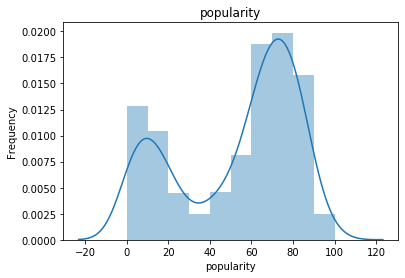

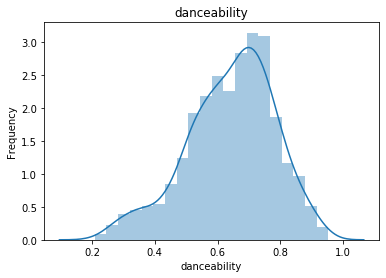

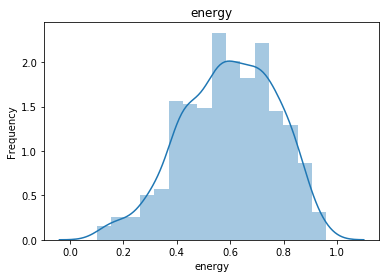

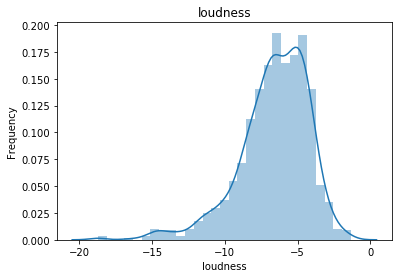

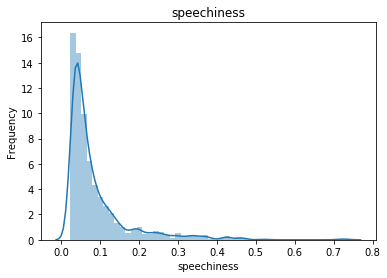

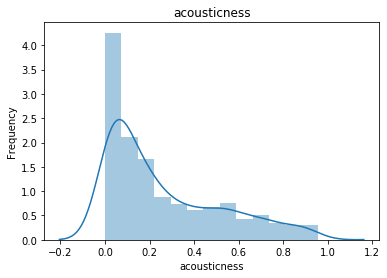

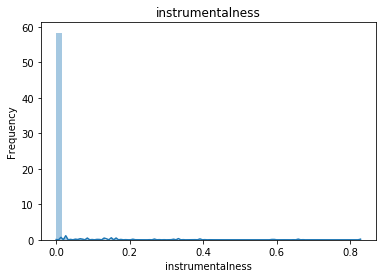

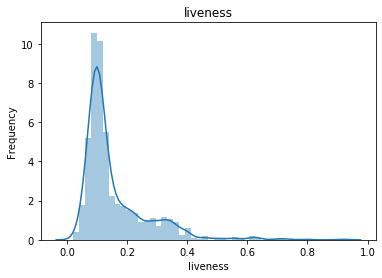

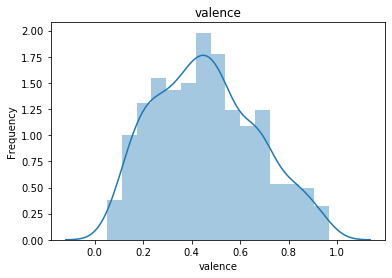

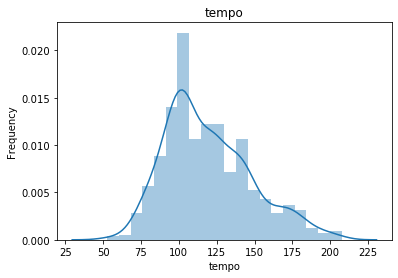

In [107]:
# Visualize histograms of each song metric
for col in ['popularity', 'danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    sns.distplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


### 2. Feature Engineering

Normalize loudness and tempo. 
>Q: Whats the best norm to use for each?


In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['loudness'] = scaler.fit_transform(df[['loudness']])
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,75,0.578,0.574,0.719890,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,85,0.358,0.557,0.651501,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,84,0.748,0.524,0.754975,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,69,0.662,0.586,0.569654,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,14,0.783,0.623,0.724664,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['tempo'] = scaler.fit_transform(df[['tempo']])
df.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,75,0.578,0.574,0.719890,0.0454,0.196,0.00000,0.0830,0.301,0.784873
1,85,0.358,0.557,0.651501,0.0590,0.695,0.00000,0.0902,0.494,0.209620
2,84,0.748,0.524,0.754975,0.0338,0.414,0.00000,0.1110,0.661,0.273963
3,69,0.662,0.586,0.569654,0.0307,0.097,0.00272,0.1150,0.296,0.241621
4,14,0.783,0.623,0.724664,0.0800,0.338,0.00000,0.0975,0.447,0.306487


Visualize the new loudness and tempo distributions

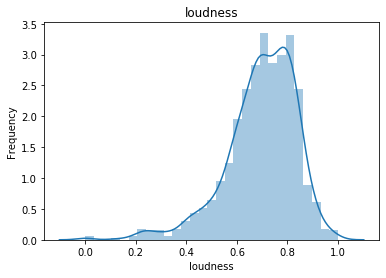

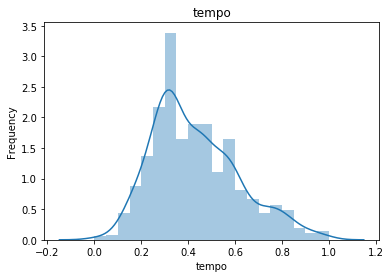

In [110]:
# Visualize histograms of each song metric
for col in ['loudness', 'tempo']:
    sns.distplot(df[col])
    plt.title(col)
    plt.ylabel('Frequency')
    plt.show()


### 3. Examine Features

To reduce variability, we could limit our analysis to only those songs that are sufficiently popular

In [111]:
#filter songs with above median popularity
df= df[df['popularity']>=61]
df = df.reset_index(drop=True)
len(df)

525

Pick 3 features that you think would give you a good fit.
>Q: *Hypothesis*: Why do you think these 3 could be a good predictor for popularity

Visualize the relationship between the features and the response using scatterplots

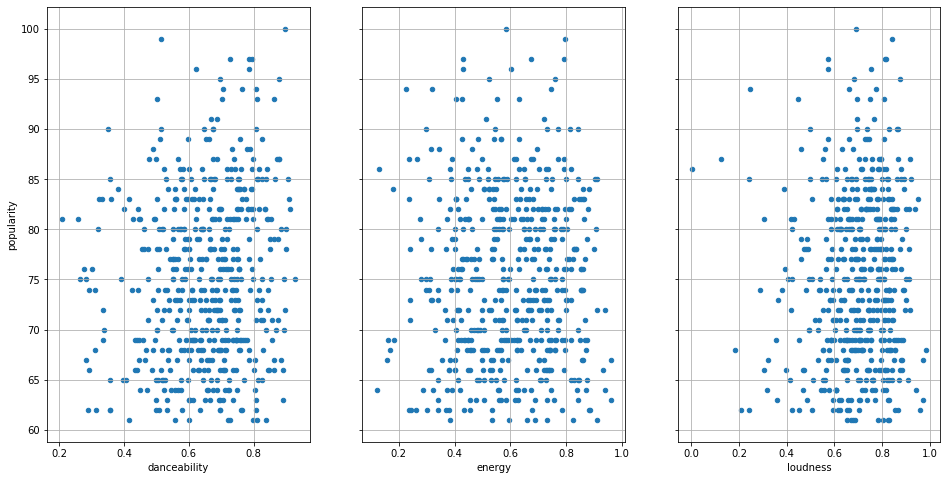

In [112]:

fig, axs = plt.subplots(1, 3, figsize=(16, 8), sharey=True)
df.plot(kind='scatter', x='danceability', y='popularity', ax=axs[0], grid=True)
df.plot(kind='scatter', x='energy', y='popularity', ax=axs[1], grid=True)
df.plot(kind='scatter', x='loudness', y='popularity', ax=axs[2], grid=True)

### 4. Fit the Model

Do the following steps for each of your selected features:

a. Determine best fit line coefficients

In [113]:
from sklearn.linear_model import LinearRegression

feature_cols = ['danceability']
X = df[feature_cols]
y = df['popularity']

model = LinearRegression(fit_intercept=True)
model.fit(X,y)

print('Model slope: %0.4f' % model.coef_[0])
print('Model intercept: %0.4f' % model.intercept_)


Model slope: 7.5728
Model intercept: 70.2751


b. Obtain the R2 for the fit

In [114]:
print('Model R2: %0.4f' % model.score(X,y))

Model R2: 0.0158


>Q: Interpret the model coefficients. What does the R2 value tell you about the fitted model?

An increase of 0.1 in danceability will result to an increase of popularity by 0.7 points. 
But based from the R2, this is a very bad fit and so we hold back from this interpretation.

c. Compute for RMSE and MAE

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#define RMSE function
def RMSE(model, X, y):
    predicted = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predicted))
    return rmse
  
#define MAE function
def MAE(model, X, y):
    predicted = model.predict(X)
    mae = mean_absolute_error(y, predicted)
    return mae

In [116]:
print('Model RMSE: %0.4f' % RMSE(model,X,y))
print('Model MAE: %0.4f' % MAE(model,X,y))

Model RMSE: 8.2269
Model MAE: 6.9072


>Q: What does the RMSE and MAE tell you about the model performance?

The model's predicted popularity is more or less expected to be off by 8.22 points (conservative) or 6.9 points (equal weighting) for all songs considered

d. Check for outliers and determine if removing them could result to a better fit

In [117]:
q1 = df['popularity'].quantile(0.25)
q3 =  df['popularity'].quantile(0.75)
IQR = q3 -q1

outliers = df[(df['popularity']<(q1-1.5*IQR))&(df['popularity']>(q3+1.5*IQR))]['popularity']
outliers

Series([], Name: popularity, dtype: int64)

### 5. Using multiple features

Will using all 3 of your chosen features result into a better fit? Repeat the procedure in 4 and see if the metrics improve.
If it did improve, do you think its enough to make the model more credible?

In [125]:
# create X and y
feature_cols = ['danceability', 'energy', 'loudness']
X = df[feature_cols]
y = df['popularity']

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
# pair the feature names with the coefficients
print(list(zip(feature_cols, lm.coef_)))

68.31872541508484
[('danceability', 7.3300771866970384), ('energy', -4.351611848467671), ('loudness', 6.738561349937369)]


In [126]:
# calculate the R-squared
lm.score(X, y)

0.021471096934127853

### 6. Using k-fold cross validation
We could further investigate on the models predictive performance using k-fold cross validation.
What does folding reveal about the linear model you built?

- For the model you built in (5), try the validation procedure for k=5 and k=10



In [ ]:
X = X.to_numpy()
Y = y.to_numpy()

In [129]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=None, shuffle=False)


for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    #print(np.shape(X_test), np.shape(Y_test))
    
    #fit using training data
    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    
    #evaluate fit of train data
    print('train: R2=%0.2f '% lin_model.score(X_train, Y_train))

    #evaluate using test data
    print('test: RMSE=%0.2f, R2=%0.2f' % (RMSE(lin_model, X_test, Y_test), lin_model.score(X_test,Y_test)))

train: R2=0.03 
test: RMSE=6.88, R2=-0.12
train: R2=0.03 
test: RMSE=7.88, R2=-0.23
train: R2=0.02 
test: RMSE=6.99, R2=0.01
train: R2=0.02 
test: RMSE=8.12, R2=0.04
train: R2=0.02 
test: RMSE=11.58, R2=-0.33


All training sets show poor fit. Some test sets produced relatively better fits, but this is only local to the fold since RMSE remains high.